# Máster en Finzas Cuantitativas
#### Javier Castillo Guillén
<hr><hr>



* Prueba de Evaluación

1. Stock market returns and volatility
Reproducir el código que viene a continuación obteniendo los resultados para Apple stock (ticker es `AAPL`)


2. ¿ Que distribución - Normal o T student -  se ajusta mejor a los datos?
Como veremos en el desarrollo del ejercicio, la ***distribución T student*** se ajusta mejor a la variable estudiada.
   

Para realizar el **punto 1 del ejercicio**. Necesitamos seguir varios pasos con el fin de obtener los datos que buscamos para poderlos analizar. En la primera parte, importaremos las librerías necesarias para obtener la información, procesarla y visualizarla.

Además, definiremos una función *retrieve_stock_data()*, con el fin de procesar el marco de datos en el formato adecuado una vez extraído de YahooFinance!.

In [1]:
# Librerías necesarias
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
from datetime import datetime
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [2]:
# Función auxiliar para crear el Marco de Datos
def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
    df = pandas.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df

Una vez hemos obtenemos los datos, en este caso de `AAPL` para el periodo *2018-2019*, lo visualizamos para en primer lugar la **gráfica de cotización**. En segundo lugar, y puesto que vamos a trabajar sobre los aspectos relacionados con el *riesgo*, además del *'action price'* **nos interesará trabajar con los retornos**.

Esta primera visualización conjunta, nos permite darnos cuenta de que, tanto la primera parte del año, como la parte final, especialmente desde que se pierde la línea de tendencia alcista, el activo ha mostrado mayor volatilidad. Sin embargo, la parte central del año se ha mostrado relativamente estable en términos de volatilidad.



Text(0.5, 1.0, 'Apple stock in 2018')

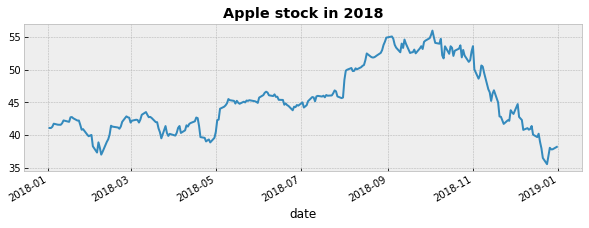

In [3]:
# Recepción de datos y visualización de la cotización
AAPL = retrieve_stock_data("AAPL", "2018-01-01", "2019-01-01")
fig = plt.figure()
fig.set_size_inches(10,3)
AAPL["adjclose"].plot()
plt.title("Apple stock in 2018", weight="bold")

Text(0.5, 1.0, 'AAPL daily returns in 2018')

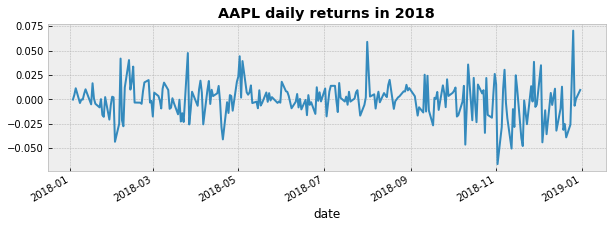

In [4]:
# Cálculo de retorno simple y gráfica

fig = plt.figure()
fig.set_size_inches(10,3)
AAPL["adjclose"].pct_change().plot()
plt.title("AAPL daily returns in 2018", weight="bold")

El siguiente paso, será observar ***cómo se distribuyen esa variable a lo largo del año*** mediante su visualización. Este paso nos podrá ayudar a interpretar qué tipo de distribución podrían seguir. Sin embargo, realizaremos otro diagnóstico que nos ayudará a definir con mayor precisión este hecho.

Una vez en este punto, podemos calcular $\sigma$ para los retornos simples, siendo $\sigma = 0.018$. Podríamos, de interesarnos, anualizarla $\sigma * \sqrt250$ 

0.018106283106026532

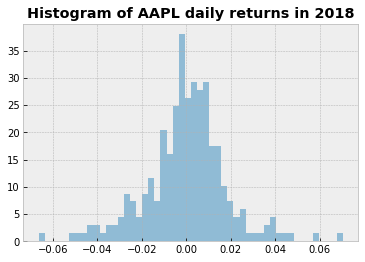

In [5]:
# Visualización del histograma y cálculo de la desviación estándar
 
AAPL["adjclose"].pct_change().hist(bins=50, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Histogram of AAPL daily returns in 2018", weight="bold")
AAPL["adjclose"].pct_change().std()

Cómo último paso para intentar determinar qué distribución se aproxima más a la variable estudiada, vamos a emplear un ***Q-Q plot*** para comparar una distribución *Normal* y una distribución *T Student* con nuestra variable. El objetivo de este proceso será determinar qué modelo se adapta mejor a la variable para el rango temporal estudiado.

Text(0.5, 1.0, 'Normal probability plot of AAPL daily returns in 2018')

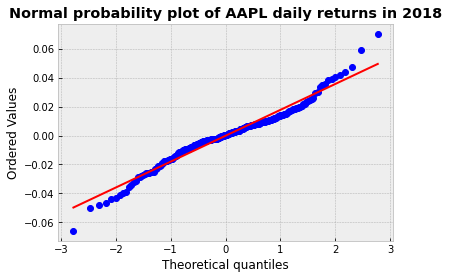

In [6]:
# Q-Q Plot para una distribución Normal(0,1)

Q = AAPL["adjclose"].pct_change().dropna()
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of AAPL daily returns in 2018", weight="bold")

Text(0.5, 1.0, 'Student probability plot of AAPL daily returns in 2018')

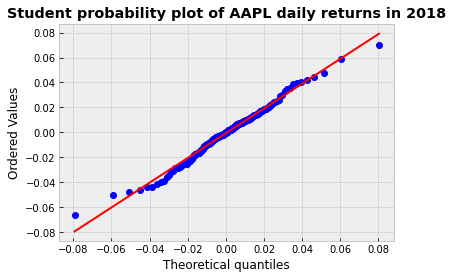

In [7]:
# Q-Q Plot para una distribución t Student

tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title("Student probability plot of AAPL daily returns in 2018", weight="bold")

#### Conclusión

Como podemos observar a través de ambos Q-Q plots, la distribución t student se ajusta mejor a la ***variable estudiada con la muestra actual*** tanto en la zona central, como especialmente en los extremos. 

## 2. Value at Risk using the historical bootstrap method

1. Reproducir el código que viene a continuación obteniendo los resultados para Apple stock (ticker is `AAPL`)

2. Explicar el Significado del Resultado obtenido.

3. Estimar el VaR al 1% y a un día.
  

Para estimar el ***Value at Risk al 1% a un día*** del activo del activo en cuestión en base a su rendimiento histórico, necesitaremos tres pasos:

1. Tomar como ejemplo un ***periodo representativo*** para la situación actual del activo y obtener los retornos de ese periodo. (O un periodo a estudiar concreto).
2. Una vez tengamos los valores a estudiar, podremos visualizarlos en el histograma.
3. Por último, ***aplicaremos el cuantil deseado*** a partir del cual se marca el punto de corte en nuestra muestra. Para nuestro ejemplo el 0.01 (o 99% de confianza).

En el siguiente código además, se calculan algunas métricas necesarias que se utilizarán en modelos siguientes. 

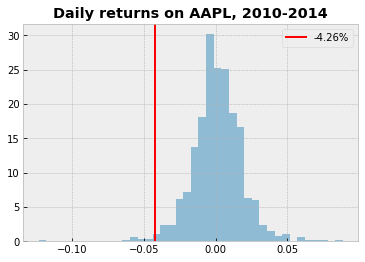

In [8]:
# Obtención de datos y visualización

stock = retrieve_stock_data("AAPL", "2010-01-01", "2014-01-01")
returns = stock["adjclose"].pct_change().dropna()
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.title(f"Daily returns on AAPL, 2010-2014", weight="bold")
plt.axvline(x=returns.quantile(0.01), linewidth=2, color="r", label=f'{(returns.quantile(0.01))*100:.2f}%')
plt.legend()

# Métricas para la distribución en el siguiente ejercicio
mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns)


In [9]:
# Resultado
returns.quantile(0.01)

-0.04258656144899698

#### Conclusión

El valor concreto que nos devuelve la función ***returns.quantile(0.01)*** es el de -0.042.

Como podemos ver en el gráfico, reste valor representa nuestro punto de corte a partir del cual el 99% de los valores quedan a la derecha. En resumen, lo que hemos hecho ha sido ordenar los valores y seleccionar el punto de corte al nivel deseado. El 1% de los datos quedarían a la izquierda (perores retornos) y el 99% a la derecha (mejores retornos).

La interpretación sería que al 99% de confianza, nuestra pérdida máxima no debería ser superior al -4.2% del capital invertido.
* ***Para 100.000usd nominales en el activo, nuestro  VaR 1%  a un día en `AAPL` = 4200usd.***

Pese a que esta metodología podría ser la más simple de obtener e intuitiva de entender, la selección de la muestra es clave.

## 3.Value at Risk using the variance-covariance method


1. Reproducir el código que viene a continuación obteniendo los resultados para Apple stock (ticker es `AAPL`)
2. Explicar el Significado del Resultado obtenido.
3. Estimar el VaR al 1% y a un día.

Antes de comenzar a desarrollar el modelo, conviene recordar que el modelo ***'variance-covariance'*** es un modelo paramétrico. Este hecho asume que la muestra está distribuida de forma normal. Como hemos comprobado anteriormente, nuestra muestra responde mejor a una distribución del tipo *t student* que a una *normal*. El asumir normalidad en la muestra, conlleva una serie de riesgos que comentaremos en la conclusión.

Para estimar el ***Value at Risk al 1% a un día*** del activo del activo en cuestión en base al método variance-covariance, necesitaremos varios pasos:

1. De nuevo, tomar como ejemplo un ***periodo representativo*** para la situación actual del activo y obtener los retornos de ese periodo.
2. Una vez tengamos los valores a estudiar, podremos visualizarlos en el histograma y trabajar con sus distribuciones (a diferencia del ejercicio anterior). En el histograma mostraremos además ***la distribución t student y normal***. 
3. Por último, ***aplicaremos el cuantil deseadopara la distribución***  a partir del cual se marca el punto de corte en nuestra muestra. Para nuestro ejemplo el 0.01 (o 99% de confianza).



Text(0.5, 1.0, 'Daily change in AAPL over 2010–2014 (%)')

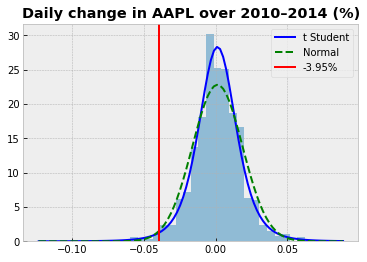

In [10]:
# Visualización de variables
support = numpy.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "b-", label='t Student') # t Student
plt.plot(support, scipy.stats.norm.pdf(support, loc=mean, scale=sigma), "g--", label ='Normal')  # Distribución normal
plt.axvline(x=scipy.stats.norm.ppf(0.01, mean, sigma), linewidth=2, color="r", label=f'{(scipy.stats.norm.ppf(0.01, mean, sigma))*100:.2f}%')

plt.legend()

plt.title("Daily change in AAPL over 2010–2014 (%)", weight="bold")


In [1]:
# Resultado
scipy.stats.norm.ppf(0.01, mean, sigma)

NameError: name 'scipy' is not defined

#### Conclusión

De forma simliar a como hicimos en el ejercicio anterior, buscamos el punto que nos devuelve valor de corte a partir del que la muestra, con una confianza es del 99% estará a la derecha. Teniendo en cuenta la distribución normal de la muestra seleccionada. En este caso, mediante *scipy.stats.norm.ppf(0.01, mean, sigma)*.

Para el cuantil 0.01, nuestro valor es de -0.0395. Del mismo modo que antes, podemos establecer que nuestra pérdida máxima al 99% de confianza no debería ser superior al -3.95% del capital invertido. 

***Para 100.000usd nominales en el activo, nuestro 1% VaR a un día en `AAPL` = 3950usd.***

Como comentábamos anteriormente, la distribución normal no se ajusta igual que la t Student para nuestra muestra especialmente en la zona de las colas. Este hecho puede hacer que cuando buscamos valores extremos, nuestra métrica sea más imprecisa. 

## 4. Value at Risk using the Monte Carlo method

1. Reproducir el código que viene a continuación.

El cuarto ejercicio consiste en ejecutar el código para la obtención del Value at Risk usando la simualción Monte Carlo. En esta aproximación, hay que tener en cuenta algunos factores que determinarán el resultado y las conclusiones:

* Las condiciones para la simulación del activo se basan en la *'Geometric Brownian Motion'* con $\mu > 0$, $\sigma = 0.04$ y $Dias = 300$ en la siguiente celda.
* La distribución de los shocks de la función *random_walk* (simulación), es considerada $N(\mu * dt ,  \sigma * \sqrt dt)$
* La visualización no esta determinada por *np.random.seed()*, por tanto cada simulación arroja valores distintos en cada ejecución del código

In [12]:
days = 300   # time horizon
dt = 1/float(days)
sigma = 0.04 # volatility
mu = 0.05  # drift (average growth rate)

In [13]:
def random_walk(startprice):
    price = numpy.zeros(days)
    shock = numpy.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

Text(0, 0.5, 'Price')

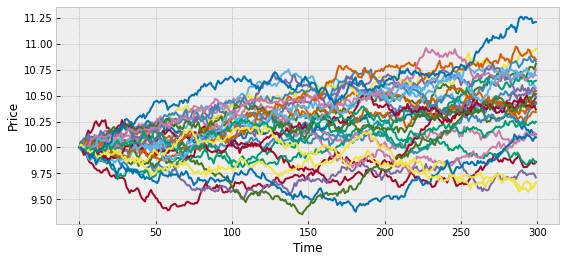

In [14]:
# Ejemplo del random walk

plt.figure(figsize=(9,4))    
for run in range(30):
    plt.plot(random_walk(10.0))
plt.xlabel("Time")
plt.ylabel("Price")

Text(0.5, 1.0, 'Final price distribution after 300 days')

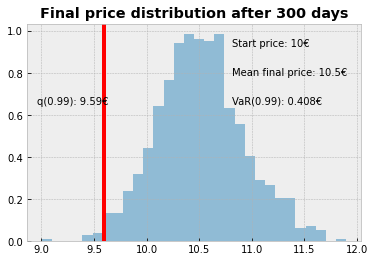

In [15]:
# Simulación y obtención del percentil 1 para el 99% y 1000 siumulaciones

runs = 1000
simulations = numpy.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(10.0)[days-1]
q = numpy.percentile(simulations, 1)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price: 10€")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}€".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}€".format(10 - q))
plt.figtext(0.15, 0.6, "q(0.99): {:.3}€".format(q))
plt.axvline(x=q, linewidth=4, color="r")
plt.title("Final price distribution after {} days".format(days), weight="bold")

In [16]:
# Diferentes metodologías en base a los datos utilizados.

import pandas as pd
data = pd.DataFrame()
data['sim'] = simulations

print(data['sim'].quantile(0.01))
print(q)

9.592279701955402
9.592279701955402


#### Conclusión

Una vez obtenemos los valores finales para cada simulación, el procedimiento es muy similar al primer modelo de VaR. La diferencia principal radica en la metodología aplicada y los valores con los que trabajamos.

1. ***Diferencia en valores:*** Los resultados no son retornos sino el valor absoluto del activo. Por este motivo, el $VaR = Precio_i - q$.  

2. ***Diferencia metodológica:*** Al trabajar con arrays de numpy, hemos de aplicar ***numpy.percentile(simulations, 1)*** en lugar de ***simulations.quantile(0.01)***. En la celda de arriba se muestra esta diferencia dependiendo de la estructura.

## 5. Correlation between stocks

1. Reproducir el código que viene a continuación obteniendo los resultados para los dos índices distintos.
2. Explicar el Significado del Resultado obtenido.
3. ¿Como podemos solucionar el problema de generar una muestra de valores que respete la correlación entre las variables ?

Los ticker de los distintos índices se pueden encontrar en https://finance.yahoo.com/world-indices
  
En este ejercicio se divide en tres partes:
1. ***Obtención*** de los datos a evaluar. En este caso los índices CAC, DAX, HSI y AORD. 
2. ***Estudio comparativo*** de los retornos sobre pares de índices (en este caso DAX-CAC).
3. ***Simulación*** donde trataremos de *mantener la correlación* existente entre variables.

In [17]:
start = "2005-01-01"
end   = "2010-01-01"
CAC = retrieve_stock_data("^FCHI", start, end)
DAX = retrieve_stock_data("^GDAXI", start, end)
HSI = retrieve_stock_data("^HSI", start, end)
AORD = retrieve_stock_data("^AORD", start, end)

df = pandas.DataFrame({ "CAC": CAC["adjclose"].pct_change(),
                        "DAX": DAX["adjclose"].pct_change(),
                        "HSI": HSI["adjclose"].pct_change(),
                        "AORD": AORD["adjclose"].pct_change()})
dfna = df.dropna()

Hasta ahora, la obtención de datos y su conversión a retornos simples no presenta mayor dificultad. Puesto que la segunda parte del ejercicio consiste en la comparativa entre variables introduciremos algunas funciones interesantes nos ayudan a obtener una visión global de forma rápida. 

* La primera que utilizaremos para un *DataFrame de pandas* es .corr() donde obtendremos el ***coeficiente de correlación de Pearson $\rho$*** para los valores de la matriz.
* Si deseamos obtener una visualización gráfica, podemos utilizar la *scatter_matrix()*

           CAC       DAX       HSI      AORD
CAC   1.000000  0.917692  0.420582  0.429368
DAX   0.917692  1.000000  0.414298  0.405073
HSI   0.420582  0.414298  1.000000  0.344320
AORD  0.429368  0.405073  0.344320  1.000000


array([[<AxesSubplot:xlabel='CAC', ylabel='CAC'>,
        <AxesSubplot:xlabel='DAX', ylabel='CAC'>,
        <AxesSubplot:xlabel='HSI', ylabel='CAC'>,
        <AxesSubplot:xlabel='AORD', ylabel='CAC'>],
       [<AxesSubplot:xlabel='CAC', ylabel='DAX'>,
        <AxesSubplot:xlabel='DAX', ylabel='DAX'>,
        <AxesSubplot:xlabel='HSI', ylabel='DAX'>,
        <AxesSubplot:xlabel='AORD', ylabel='DAX'>],
       [<AxesSubplot:xlabel='CAC', ylabel='HSI'>,
        <AxesSubplot:xlabel='DAX', ylabel='HSI'>,
        <AxesSubplot:xlabel='HSI', ylabel='HSI'>,
        <AxesSubplot:xlabel='AORD', ylabel='HSI'>],
       [<AxesSubplot:xlabel='CAC', ylabel='AORD'>,
        <AxesSubplot:xlabel='DAX', ylabel='AORD'>,
        <AxesSubplot:xlabel='HSI', ylabel='AORD'>,
        <AxesSubplot:xlabel='AORD', ylabel='AORD'>]], dtype=object)

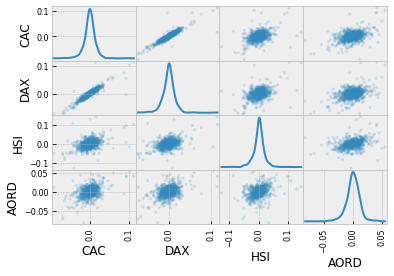

In [18]:
print(dfna.corr())
pd.plotting.scatter_matrix(dfna, alpha=0.2, diagonal='kde')

En seguida vemos que existen algunos pares que merece la pena estudiar con detenimiento. Por ejemplo, la pareja DAX-CAC posee $\rho = 0.91$. A continuación, trabajaremos con ellos de forma detallada obteniendo sus gráficas de forma individual y sus distribuciones.

Text(0.5, 1.0, 'CAC vs DAX daily returns, 2005–2010')

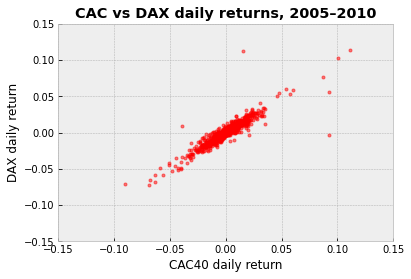

In [19]:
ax = plt.axes()
ax.set_xlim(-0.15, 0.15)
ax.set_ylim(-0.15, 0.15)
plt.plot(dfna["CAC"], dfna["DAX"], "r.", alpha=0.5)
plt.xlabel("CAC40 daily return")
plt.ylabel("DAX daily return")
plt.title("CAC vs DAX daily returns, 2005–2010", weight="bold")

In [20]:
scipy.stats.pearsonr(dfna["CAC"], dfna["DAX"])

(0.9176923741808769, 0.0)

CAC t fit: mean=0.0005614732069055624, scale=0.008993471689559836, df=2.7622973761215905


Text(0.5, 1.0, 'Histogram of CAC40 daily returns over 2005–2010')

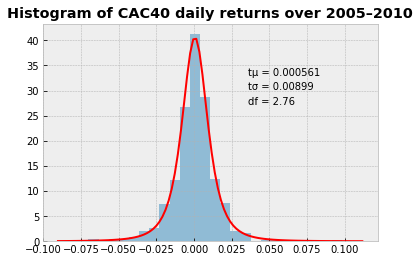

In [21]:
returns = dfna["CAC"]
returns.hist(bins=30, density=True, histtype="stepfilled", alpha=0.5)
support = numpy.linspace(returns.min(), returns.max(), 100)
tdf, tmean, tsigma = scipy.stats.t.fit(returns)
print("CAC t fit: mean={}, scale={}, df={}".format(tmean, tsigma, tdf))
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-")
plt.figtext(0.6, 0.7, "tμ = {:.3}".format(tmean))
plt.figtext(0.6, 0.65, "tσ = {:.3}".format(tsigma))
plt.figtext(0.6, 0.6, "df = {:.3}".format(tdf))
plt.title("Histogram of CAC40 daily returns over 2005–2010", weight="bold")

DAX t fit: mean=0.0009648852436396147, scale=0.008832711177617329, df=2.7513935434499297


Text(0.5, 1.0, 'Histogram of DAX daily returns over 2005–2010')

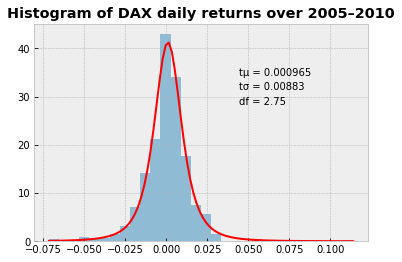

In [22]:
returns = dfna["DAX"]
returns.hist(bins=30, density=True, histtype="stepfilled", alpha=0.5)
support = numpy.linspace(returns.min(), returns.max(), 100)
tdf, tmean, tsigma = scipy.stats.t.fit(returns)
print("DAX t fit: mean={}, scale={}, df={}".format(tmean, tsigma, tdf))
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-")
plt.figtext(0.6, 0.7, "tμ = {:.3}".format(tmean))
plt.figtext(0.6, 0.65, "tσ = {:.3}".format(tsigma))
plt.figtext(0.6, 0.6, "df = {:.3}".format(tdf))
plt.title("Histogram of DAX daily returns over 2005–2010", weight="bold")

Por útlimo, buscamos realizar una simulación para los valores seleccionados. El código propuesto realiza la simulación, sin embargo, al realizarse, aunque mantienen la distribución requerida, estos activos pierden la correlación. Una característica que en algunos casos es clave, como hemos podido ver para CAC-DAX con $\rho = 0.91$. En nuestra simulación $\rho = 0.01$

(-0.0058967725368770695, 0.6767777730649495)


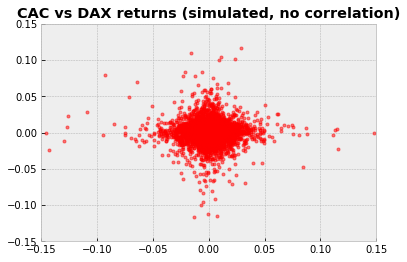

In [23]:
runs = 5000
fittedCAC = numpy.zeros(runs, float)
fittedDAX = numpy.zeros(runs, float)
for i in range(runs):
    fittedCAC[i] = scipy.stats.t.rvs(loc=0.000478137351981, scale=0.00898201242824, df=2.75557323986)
    fittedDAX[i] = scipy.stats.t.rvs(loc=0.000847802944791, scale=0.00878082895409, df=2.71766905436)
ax = plt.axes()
ax.set_xlim(-0.15, 0.15)
ax.set_ylim(-0.15, 0.15)
plt.plot(fittedCAC, fittedDAX, "r.", alpha=0.5)
plt.title("CAC vs DAX returns (simulated, no correlation)", weight="bold")

print(scipy.stats.pearsonr(fittedCAC, fittedDAX))

### Introducir correlación

Como hemos visto, la simulación previa no mantiene la correlación entre la generación de datos. La metodología aplicada será observar la matriz de covarianza de los datos históricos, y aplicar una descomposición de Cholesky que introduciremos a los datos aleatorios generados. Los procesos a seguir serán los siguientes:

1. ***Limpiar el dataframe*** para quedarnos con los datos deseados
2. Obtener la ***Matriz de Covarianza y la descomposición Cholesky***
3. Multiplicar la matriz de datos generados (Descorrelacionados) x Matriz Cholesky para ***obtener datos con correlación.***
4. Evaluar los ***datos de forma gráfica***

In [24]:
dfna.tail()

,CAC,DAX,HSI,AORD
date,,,,
2009-12-22,0.006797,0.002556,0.006871,0.006710
2009-12-23,0.003173,0.001976,0.011222,0.009924
2009-12-28,0.008797,0.007634,-0.001709,0.011117
2009-12-29,0.003250,0.001438,0.000895,-0.001997
2009-12-30,-0.006182,-0.009003,-0.000131,0.007365


In [25]:
dfna= dfna.drop(['HSI','AORD'], axis=1) # Estudiaremos solo CAC-DAX
matriz_cov = dfna.cov() # Matriz Covarianza
chol = numpy.linalg.cholesky(matriz_cov) # Matriz Cholesky CAC-DAX
chol

array([[0.01546595, 0.        ],
       [0.01395257, 0.00604041]])

### Procesado y visualización

En este apartado, prepararemos nuestros DataFrames, introduciremos la correlación y la comprobaremos con $\rho$ en la última línea de código. Una vez más, al no disponer de *random.seed()* en la generación de los números aleatorios, estos valores pueden modificarse ligeramente dependiendo de la simulación aunque mostrarán valores cercanos a la correlación histórica.

(0.9186253245836462, 0.0)


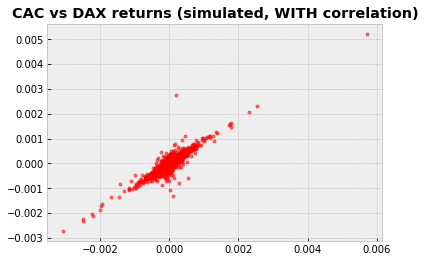

In [26]:
uncorr_data = pd.DataFrame()
uncorr_data['CAC'] = fittedCAC
uncorr_data['DAX'] = fittedDAX

# Introducción de la descomposición
corr_data = pd.DataFrame(numpy.matmul(chol , uncorr_data.T)).T 
corr_data= corr_data.rename(columns={0:'CAC', 1:'DAX'})


plt.plot(corr_data['CAC'],corr_data['DAX'], "r.", alpha=0.5)
plt.title("CAC vs DAX returns (simulated, WITH correlation)", weight="bold")

# Coeficiente de correlación
print(scipy.stats.pearsonr(corr_data['CAC'], corr_data['DAX']))


### Retorno acumulado SIN correlación

Al observar cuál hubiese sido el comportamiento de los datos simulados ***SIN CORRELACIÓN***, podemos comprobar que el comportamiento de los retornos no tiene que ver con el comportamiento esperado para estos dos índices

Text(0.5, 1.0, 'Retornos acumulados simulados sin correlación')

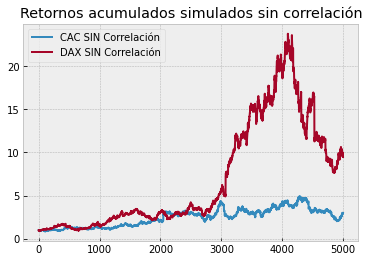

In [27]:
plt.plot((1 + uncorr_data['CAC']).cumprod(), label= 'CAC SIN Correlación')
plt.plot((1 + uncorr_data['DAX']).cumprod(), label= 'DAX SIN Correlación')
plt.legend()
plt.title('Retornos acumulados simulados sin correlación')

### Retorno acumulado con correlación

Una vez introducimos los datos con correlación, podemos observar que el gráfico tiene mucho más sentido para nuestra simulación respetando la correlación.

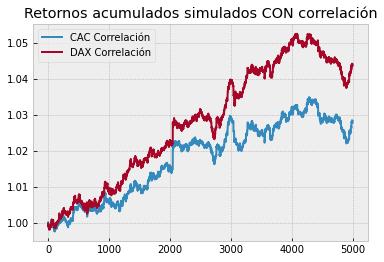

In [28]:
plt.plot((1 + corr_data['CAC']).cumprod(), label= 'CAC Correlación')
plt.plot((1 + corr_data['DAX']).cumprod(), label= 'DAX Correlación')
plt.title('Retornos acumulados simulados CON correlación')
plt.legend()